### eXtreme Gradient Boosting (XGBoost)
##### GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş, ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
###### GBM'in bazı mekanik problemlerini gidermek için ortaya çıkmıştır.
###### Ölçeklenebilirdir.
###### Hızlıdır.
###### Tahmin başarısı yüksektir.

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Model & Predict

In [5]:
from xgboost import XGBClassifier

In [6]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [7]:
y_pred = xgb_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7359307359307359

#### Model Tuning

In [9]:
xgb = XGBClassifier()

In [10]:
xgb_params = {"n_estimators": [100, 500, 1000],
              "subsample": [0.6, 0.8, 1],
              "max_depth": [3, 5, 7],
              "learning_rate": [0.1, 0.001, 0.01]}

In [11]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [12]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [13]:
xgb_tuned = XGBClassifier(learning_rate = 0.001, max_depth=7, n_estimators=500, subsample=0.6).fit(X_train, y_train)

In [14]:
y_pred = xgb_tuned.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.7575757575757576

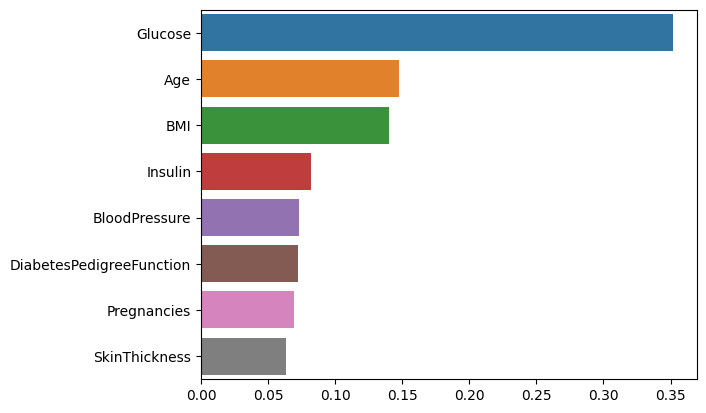

In [17]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index);